<a href="https://colab.research.google.com/github/supritat/EIP4/blob/master/session_2/Second_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


### Load pre-shuffled MNIST data into train and test sets

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


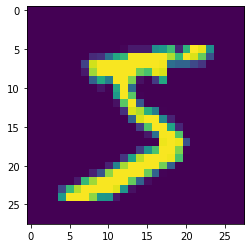

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [8]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [41]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', bias=False, input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu', bias=False)) # 24
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(16, 3, 3, activation='relu', bias=False)) # 22
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2))) # 11
model.add(Convolution2D(10, 1, 1, activation='relu', bias=False)) # 11
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu', bias=False)) # 9
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu', bias=False)) # 7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, activation='relu', bias=False)) #7
model.add(BatchNormalization())

model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipy

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 16)        2304      
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 16)        2304      
_________________________________________________________________
batch_normalization_17 (Batc (None, 22, 22, 16)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, 1, activation="relu", use_bias=False)`


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=512, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test),)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 2560/60000 [>.............................] - ETA: 4s - loss: 0.0022 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 3s 53us/step - loss: 0.0051 - acc: 0.9983 - val_loss: 0.0262 - val_acc: 0.9936
Epoch 2/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0050 - acc: 0.9983 - val_loss: 0.0264 - val_acc: 0.9932
Epoch 3/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0058 - acc: 0.9978 - val_loss: 0.0241 - val_acc: 0.9941
Epoch 4/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0050 - acc: 0.9984 - val_loss: 0.0237 - val_acc: 0.9939
Epoch 5/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0061 - acc: 0.9982 - val_loss: 0.0273 - val_acc: 0.9934
Epoch 6/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0061 - acc: 0.9980 - val_loss: 0.0293 - val_acc: 0.9926
Epoch 7/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0069 - acc: 0.9978 - val_loss: 0.0247 - val_acc: 0.9928
Epoch 8/20
60000/60000 [============================

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [56]:
print(score)

[0.024333918413715627, 0.9942]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[7.10206546e-20 1.33684981e-18 3.67183199e-13 1.48744315e-11
  5.06271144e-23 1.57191065e-18 2.62857141e-33 1.00000000e+00
  2.05473029e-18 2.76311015e-16]
 [3.49108500e-17 1.14566195e-11 1.00000000e+00 6.10696783e-20
  1.48931338e-23 4.47221176e-22 4.51072414e-16 8.02587578e-25
  3.67128008e-16 5.62515412e-24]
 [9.77090370e-12 1.00000000e+00 1.87088248e-10 4.64608742e-16
  3.32532300e-11 1.52047628e-11 2.23784402e-12 1.35468579e-08
  2.26530444e-11 2.79629987e-12]
 [9.99995947e-01 1.13035727e-11 3.81093628e-08 4.03613809e-11
  1.02833364e-09 2.59468419e-10 2.96631857e-08 7.65913166e-10
  2.57090313e-08 4.07803509e-06]
 [7.06083012e-16 7.80378149e-13 3.82103868e-16 2.35845207e-15
  1.00000000e+00 1.89252545e-16 4.13992091e-16 3.40005866e-12
  4.43854378e-14 2.12826254e-08]
 [8.27088537e-11 1.00000000e+00 4.38837994e-11 2.72660799e-17
  1.64753711e-10 2.97050592e-14 1.94649798e-13 1.44182719e-08
  6.12477040e-12 2.85583319e-12]
 [3.72599358e-24 1.15839353e-14 5.35631364e-15 1.53993720e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

IndexError: ignored

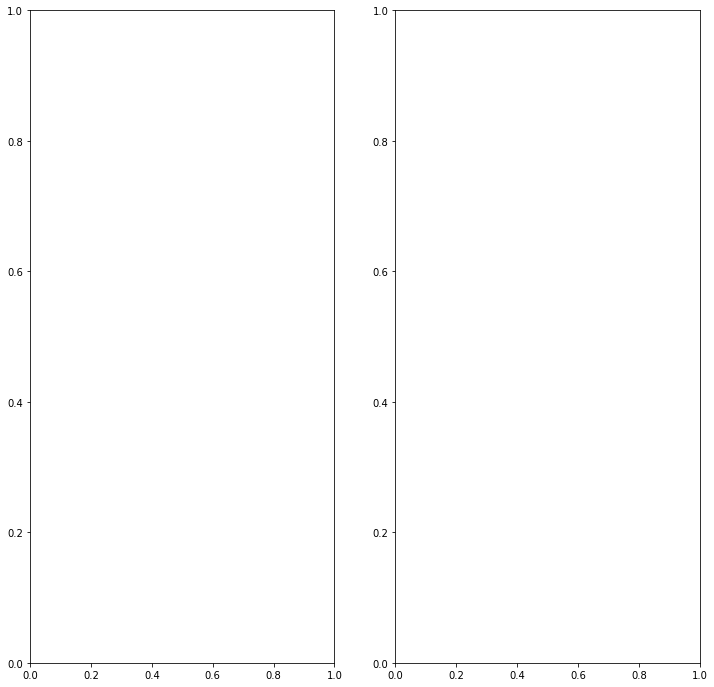

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_8'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()